In [45]:
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use("seaborn")

# Fetch the ethin dataset & Network

In [20]:
from SCFInitialGuess.utilities.dataset import make_butadien_dataset

dim = 38

S, P = np.load("../ethin/dataset_ethin_6-31g**.npy")
molecules = np.load("../ethin/molecules_ethin_6-31g**.npy")
dataset, molecules = make_butadien_dataset(molecules, S.reshape(-1, dim, dim), P.reshape(-1, dim, dim))

[-] 2018-05-07 12:22:37: Data set normalized. Mean value std: 0.02775708963766184


In [9]:
from SCFInitialGuess.nn.networks import EluFixedValue

graph = tf.Graph()

structure, weights, biases = np.load("../ethin/network_ethin.npy", encoding="latin1")

with graph.as_default():
    sess = tf.Session()
    network = EluFixedValue(structure, weights, biases)
    network.setup()
    sess.run(tf.global_variables_initializer())

In [12]:
from SCFInitialGuess.utilities.dataset import extract_triu
s_normed_triu = np.array(list(map(lambda x: extract_triu(x, dim), dataset.testing[0])))

# calculate the guesses 

In [21]:
from pyscf.scf import hf
from SCFInitialGuess.utilities.dataset import make_matrix_batch
from SCFInitialGuess.nn.post_processing import multi_mc_wheeny

p_nn = network.run(sess, s_normed_triu)

p_batch = make_matrix_batch(p_nn, dim, True)
p_mcw1 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=1), zip(p_batch, dataset.testing[0]))))
p_mcw5 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=5), zip(p_batch, dataset.testing[0]))))

p_sap = np.array([
    hf.init_guess_by_atom(mol.get_pyscf_molecule()) for mol in molecules[1]
])
p_minao = np.array([
    hf.init_guess_by_minao(mol.get_pyscf_molecule()) for mol in molecules[1]
])
p_gwh = np.array([
    hf.init_guess_by_wolfsberg_helmholtz(mol.get_pyscf_molecule()) for mol in molecules[1]
])

Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs s

# create the plot


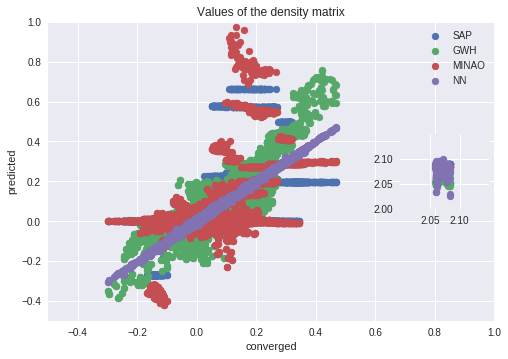

In [94]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

expected = dataset.testing[1].flatten()
upper = 1
lower = -.5


#--- outer ---
fig, ax = plt.subplots()
plt.scatter(expected, p_sap.flatten(), label="SAP")
plt.scatter(expected, p_gwh.flatten(), label="GWH")
plt.scatter(expected, p_minao.flatten(), label="MINAO")
plt.scatter(expected, p_batch.flatten(), label="NN")

plt.title("Values of the density matrix")
plt.ylabel("predicted")
plt.xlabel("converged")
plt.xlim(lower, upper)
plt.ylim(lower, upper)
plt.legend()
#---

#--- insert ---
lower, upper = 2.0, 2.15
ax_inner = inset_axes(ax, width="20%", height="25%", loc=7)
ax_inner.scatter(expected, p_sap.flatten(), label="SAP")
ax_inner.scatter(expected, p_gwh.flatten(), label="GWH")
ax_inner.scatter(expected, p_minao.flatten(), label="MINAO")
ax_inner.scatter(expected, p_batch.flatten(), label="NN")

plt.xlim(lower, upper)
plt.ylim(lower, upper)
plt.xticks([2.05, 2.1])
plt.yticks([2.0,2.05, 2.1])

ax_inner.add_patch(Rectangle((0,0), height=0.15, width=0.15))

#---
plt.savefig("/home/jcartus/Repos/cc2aiPoster/figures/EthinPredictionScatter.png")
plt.show()

In [28]:
p_batch.flatten().shape

(72200,)